In [1]:
# Imports
from env import host, user, password
import os

import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

import matplotlib.pyplot as plt
import seaborn as sns

import wrangle as w
np.random.seed(42)

# Initial data pull and looking at / seeking to understand data

In [2]:
# initial sql query 
df = w.get_zillow_data()

csv file found and read


In [3]:
df.head()

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
0,0.0,0.0,NaN,27516.0,NaN,NaN,6037.0
1,0.0,0.0,NaN,10.0,NaN,NaN,6037.0
2,0.0,0.0,NaN,10.0,NaN,NaN,6037.0
3,0.0,0.0,NaN,2108.0,NaN,174.21,6037.0
4,4.0,2.0,3633.0,296425.0,2005.0,6941.39,6037.0


In [4]:
#rename columns to something less unwieldy
df.columns = ['bedroom_cnt', 'bathroom_cnt', 'square_feet', 'tax_value_cnt', 'year_built', 'tax_amount', 'fips']

In [ ]:
df.info()

In [ ]:
df.isnull().sum()

In [ ]:
df.bedroomcnt.value_counts(dropna=False)

In [ ]:
df.bathroomcnt.value_counts(dropna=False)

In [ ]:
df.square_feet.value_counts()

In [ ]:
df.tax_value_cnt.sort_values()

In [ ]:
(df.tax_value_cnt % 1).sum()

In [ ]:
# decided to drop all nulls since it was only ~1% of data
# -- actually only .6% of data because some rows had multiple nulls
df = df.dropna()

In [ ]:
df.shape


In [ ]:
# most columns can/should be integers; exception was bathroom_cnt which I left as a float
for col in df.columns [df.columns != 'bathroom_cnt']:
#     print (col)
    df[col] = df[col].astype(int)

In [ ]:
# decided fips should really be a string to better represent a categorical variable
df.fips = df.fips.astype(str)

# Acquire Summary
- combined acquire and clean_up code into wrangle_zillow (not yet split)

In [5]:
df = w.wrangle_zillow()

csv file found and read


# Visualization of univariate variables

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2140235 entries, 4 to 2152862
Data columns (total 7 columns):
 #   Column         Dtype  
---  ------         -----  
 0   bedroom_cnt    int64  
 1   bathroom_cnt   float64
 2   square_feet    int64  
 3   tax_value_cnt  int64  
 4   year_built     int64  
 5   tax_amount     int64  
 6   fips           object 
dtypes: float64(1), int64(5), object(1)
memory usage: 130.6+ MB


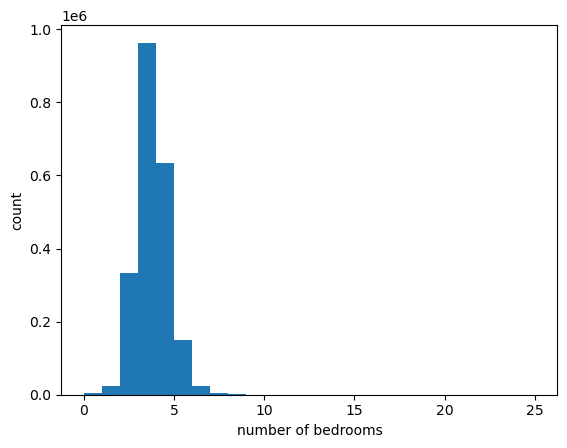

In [7]:
bins_ = range(0,26)
plt.hist(df.bedroom_cnt, bins=bins_)
plt.ylabel('count')
plt.xlabel('number of bedrooms')
plt.show()

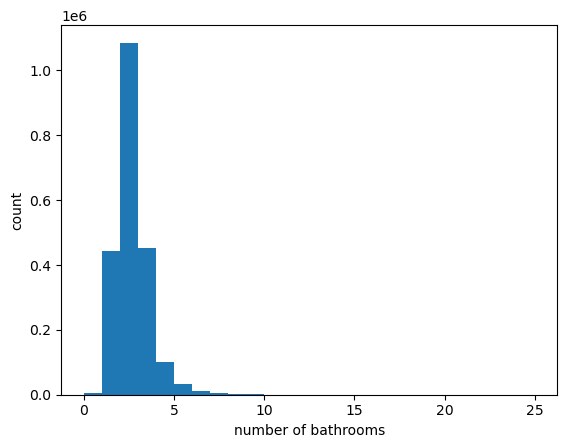

In [8]:
plt.hist(df.bathroom_cnt, bins=bins_)
plt.ylabel('count')
plt.xlabel('number of bathrooms')
plt.show()

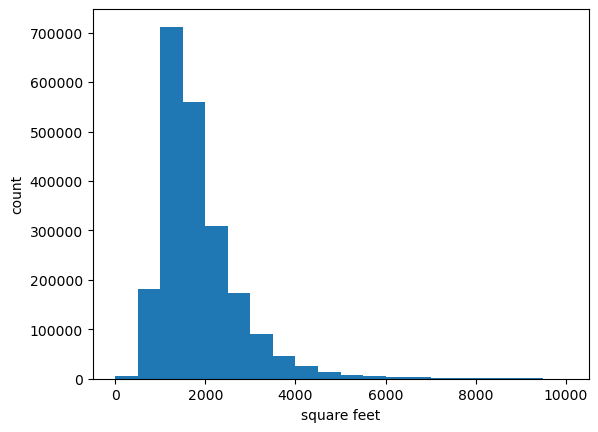

In [9]:
sf_bins = [0,500,1000,1500,2000,2500,3000,3500,4000,4500,5000,5500,6000,6500,7000,7500,8000,8500,9000,9500,10000]
plt.hist(df.square_feet, bins=sf_bins)
plt.ylabel('count')
plt.xlabel('square feet')
plt.show()

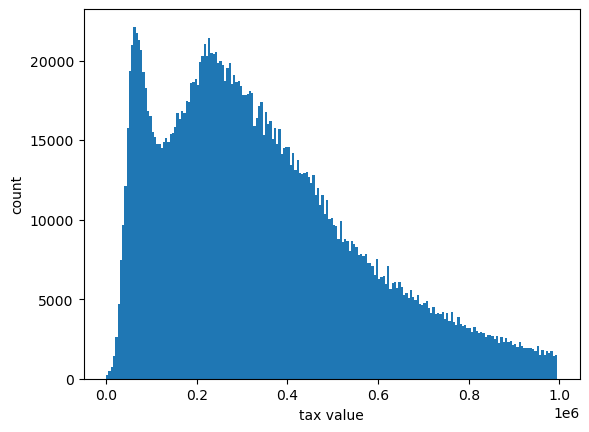

In [10]:
tax_value_cnt_bins = range(0,1_000_000,5000)
plt.hist(df.tax_value_cnt, bins=tax_value_cnt_bins)
plt.ylabel('count')
plt.xlabel('tax value')
plt.show()

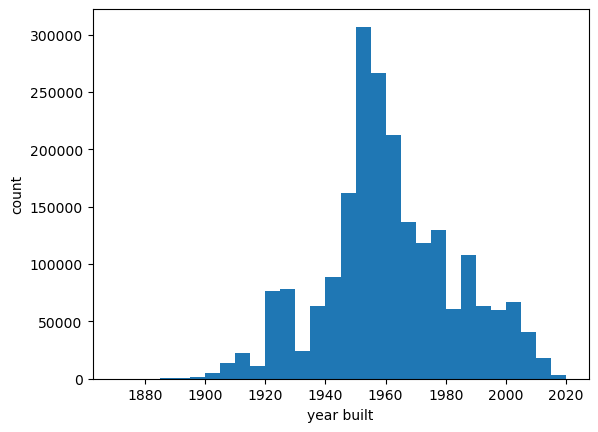

In [11]:
year_bins = range(1870,2025,5)
plt.hist(df.year_built, bins=year_bins)
plt.ylabel('count')
plt.xlabel('year built')
plt.show()

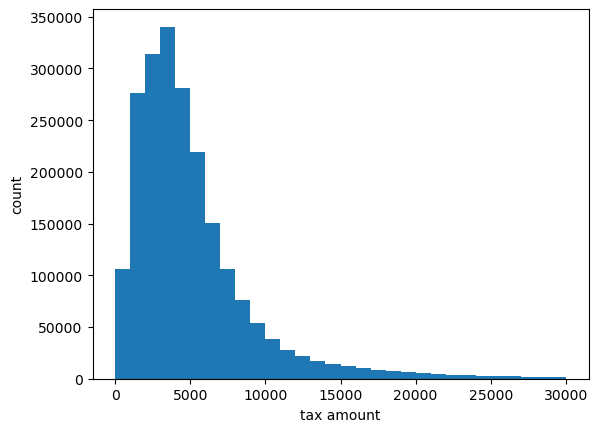

In [12]:
tax_amt_range = range(0,31000,1000)
plt.hist(df.tax_amount, bins=tax_amt_range)
plt.ylabel('count')
plt.xlabel('tax amount')
plt.show()

In [13]:
df.fips.value_counts()

6037    1425207
6059     552057
6111     162971
Name: fips, dtype: int64

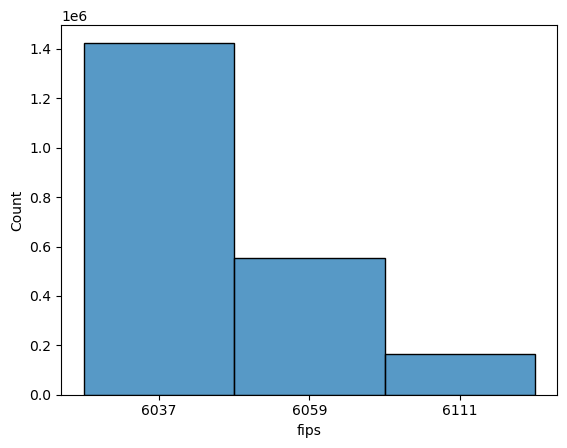

In [14]:
# fips is more of a categorical variable; casting it as a string made it work better with histplot
# fips has only 3 unique values: 6037, 6059, 6111
sns.histplot(data=df.fips)
# plt.ylabel('count')
# plt.xlabel('fips')
plt.show()

In [15]:
# I wasn't supposed to do this until after splitting!
# mean values for each column broken down by fips code
for fip in df.fips.unique():
    for col in df.drop(columns=['bedroom_cnt','bathroom_cnt','year_built','fips']).columns:
        print(f'{fip}   mean {col}: {df[df.fips == fip][col].mean()}')
        print(f'{fip} median {col}: {df[df.fips == fip][col].median()}')
    print()

6037   mean square_feet: 1773.485500702705
6037 median square_feet: 1536.0
6037   mean tax_value_cnt: 437636.7140920582
6037 median tax_value_cnt: 295376.0
6037   mean tax_amount: 5509.393902780438
6037 median tax_amount: 3883.0

6059   mean square_feet: 2050.6193798828745
6059 median square_feet: 1832.0
6059   mean tax_value_cnt: 526527.2072141102
6059 median tax_value_cnt: 406046.0
6059   mean tax_amount: 6071.103703059648
6059 median tax_amount: 4688.0

6111   mean square_feet: 2012.8134085205343
6111 median square_feet: 1810.0
6111   mean tax_value_cnt: 438638.71375275357
6111 median tax_value_cnt: 372790.0
6111   mean tax_amount: 5009.508397199502
6111 median tax_amount: 4271.0



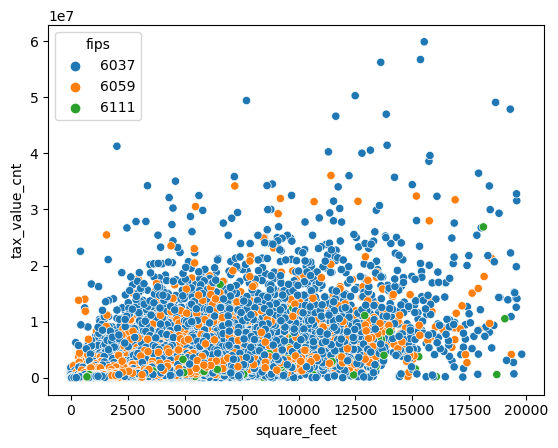

In [16]:
# Bad - do this after splitting
sns.scatterplot(data=df[df.square_feet<20000], x='square_feet', y='tax_value_cnt', hue='fips')
plt.show()

bedroom_cnt


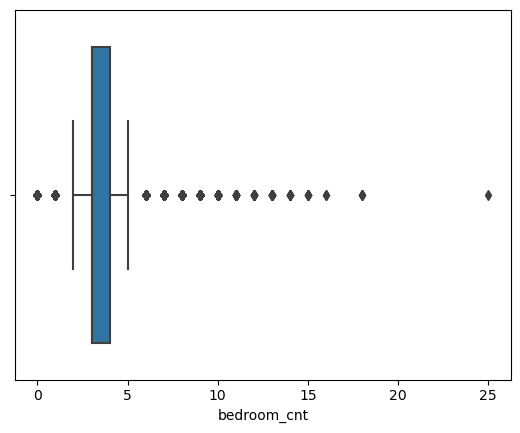

bathroom_cnt


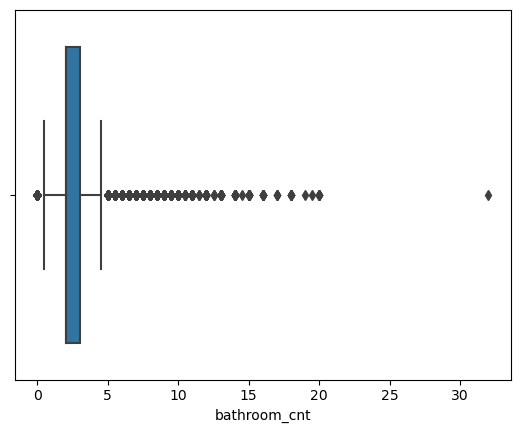

square_feet


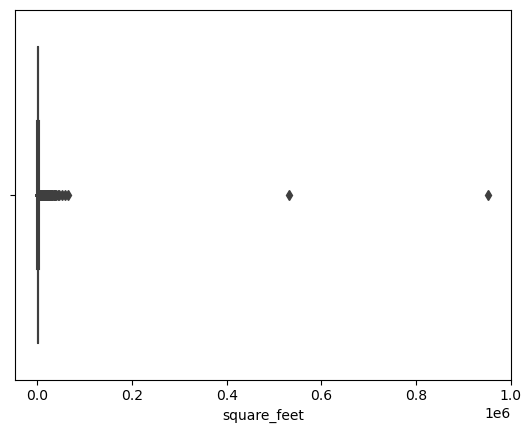

tax_value_cnt


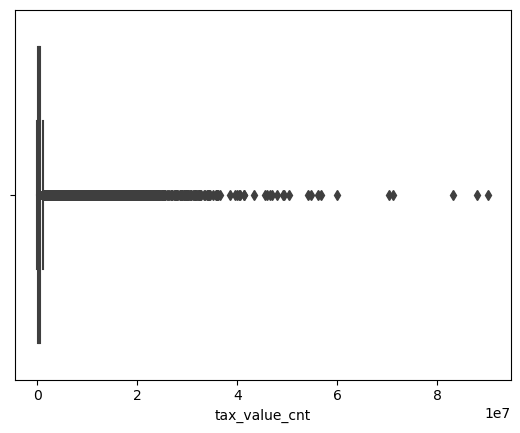

year_built


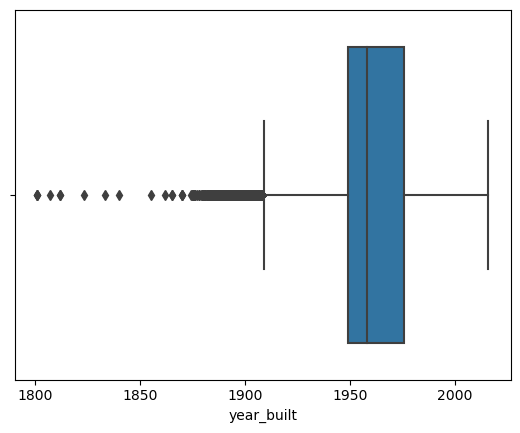

tax_amount


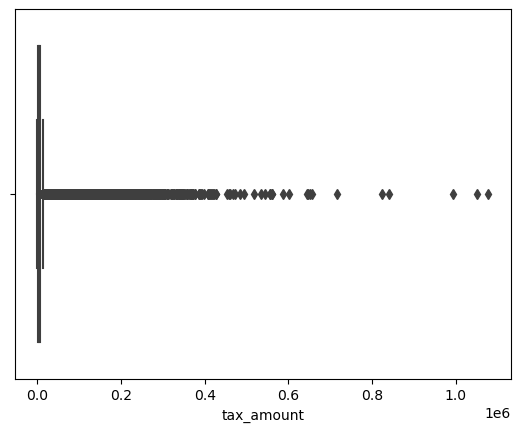

In [17]:
# boxplots for all numerica columns (everything but fips)
for col in (df.drop(columns='fips').columns):
    print (col)
    sns.boxplot(data=df, x=col)
    plt.show()
    

# Summary of initial look at data
- 2152863 rows prior to cleaning
- 2140235 rows after cleaning
- nulls represented < 1% of data, so I removed them
- 7 columns: 6 numeric, 1 categorical
- changed all numeric columns to int except bathroom_cnt which stayed float
- one numeric column, fips, is actually categorical, and it has 3 unique values: 6037, 6059, 6111
    - fips represents a region code akin to zip code (fips stands for federal information processing system)
    - 6037 == '06037' which is Los Angeles County in CA
    - 6059 == '06059' which is Orange County, CA
    - 6111 == '06111' which is Ventura County, CA

- each row is a "Single Family Residential" property from a 2017 Zillow database
- each column is an attribute of that house. All columns are numeric
- most numeric columns have normally distributed values with right skew (right tails, mean greater than median)
    - which indicates a smaller number of higher values (square feet, tax_value, etc.)
    - which also indicates that a small number of these properties are big/high-value "mansion" type houses
- fips distribution:
    - 1.4 M homes in 6037 (LA County)
    -  .6 M homes in 6059 (Orange County) 
    -  .15M homes in 6111 (Ventura County)
    
- there are a couple of homes in 6059 (Orange County) that are way larger (sq ft) than the others